In [1]:
%load_ext autoreload
import sys, os
COLAB = 'google.colab' in sys.modules 
if COLAB and 'procgen-tools' not in os.getcwd():
    os.system("git clone https://github.com/UlisseMini/procgen-tools")
    os.chdir('procgen-tools')
    %pip install -r requirements.txt

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from procgen import ProcgenGym3Env
import envs.maze as maze
from models import load_policy
import torch
from IPython import display
from glob import glob
import pickle
from tqdm import tqdm
from data_util import Episode, load_episode
from metric_utils import metrics, decision_square
import os
from collections import defaultdict

In [3]:
files = glob('data/*region_5*.pkl')
runs = []
load_venv = False
for f in files:
    try:
        runs.append(load_episode(f, load_venv=load_venv))
    except (AssertionError, KeyError) as e:
        print(f"Malformed file {f}: {e}")
        #os.remove(f)

len(runs)

1885

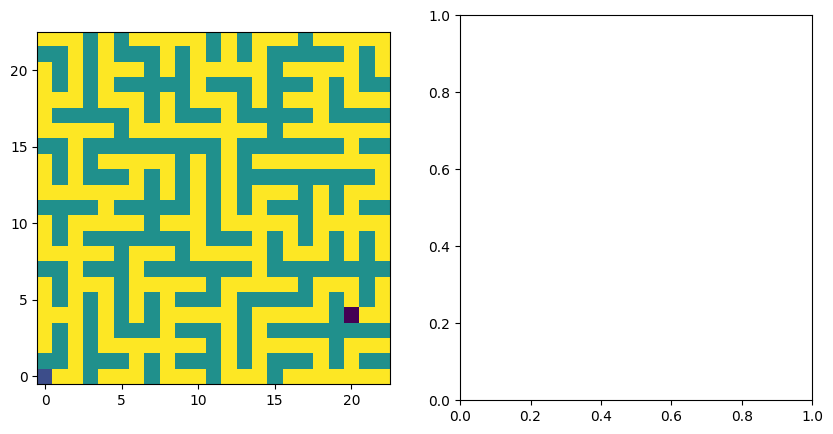

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
R = 3
ax[0].imshow(runs[R].grid(), origin='lower')
if load_venv: ax[1].imshow(runs[R]["start_info"]["rgb"])
plt.show()

## Graph metrics on all grids

In [5]:
recorded_metrics = defaultdict(list)
for run in tqdm(runs):
    g = run.grid()
    if decision_square(g) is None:
        continue
    for name, metric in metrics.items():
        recorded_metrics[name].append(metric(g))


100%|██████████| 1885/1885 [00:12<00:00, 157.07it/s]


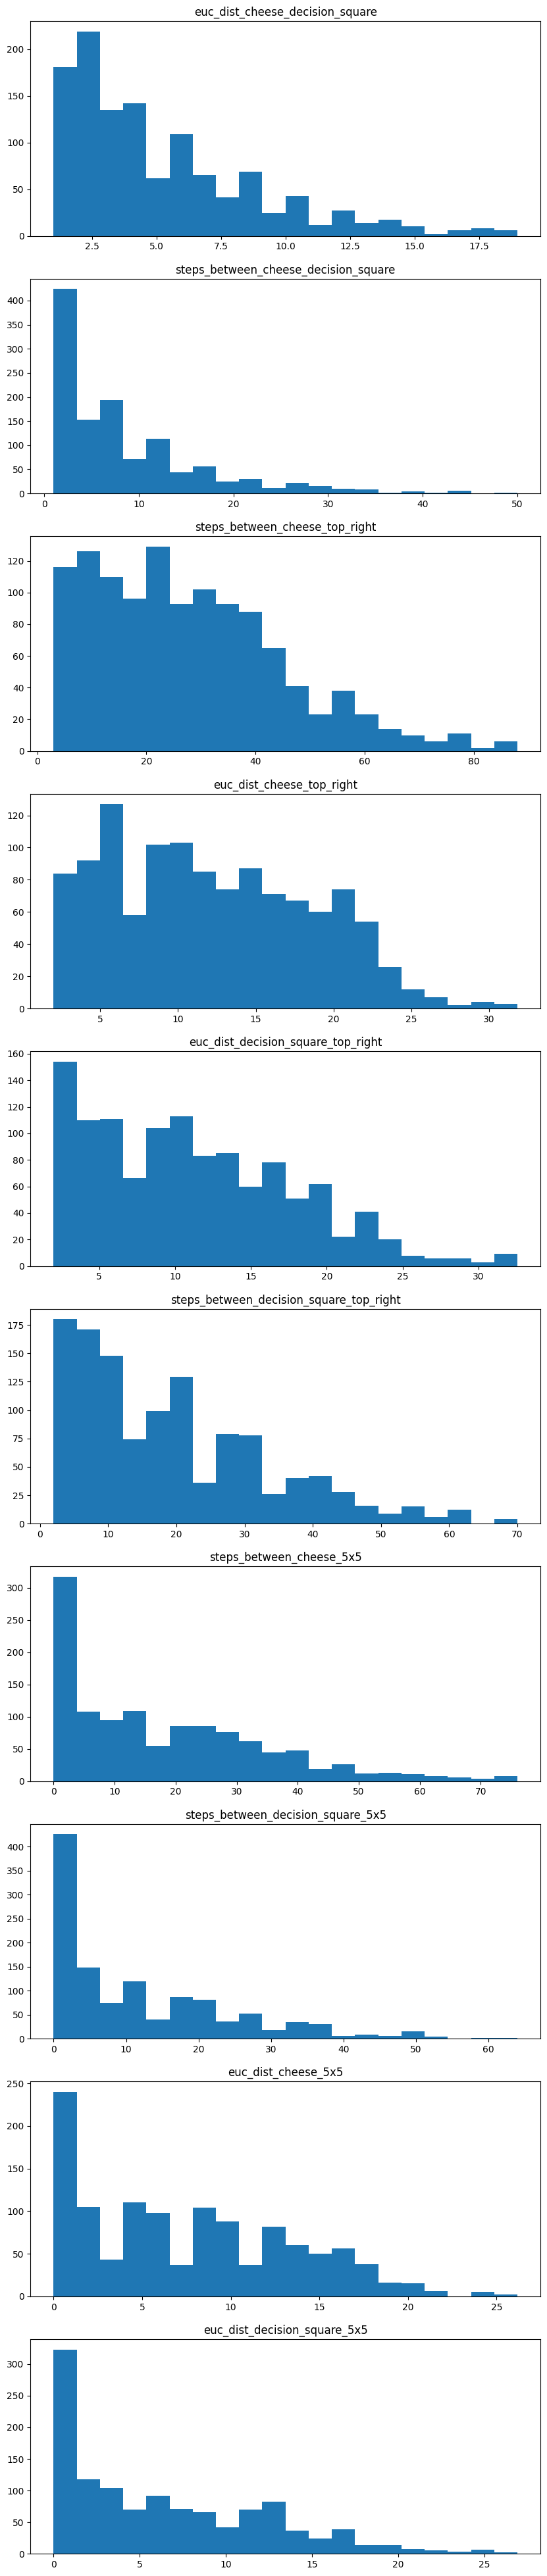

In [9]:
# Use matplotlib to plot all recorded_metrics by name (key) vertically in a single figure
fig, ax = plt.subplots(len(recorded_metrics), 1, figsize=(10, 5*len(recorded_metrics)))
for i, (name, values) in enumerate(recorded_metrics.items()):
    ax[i].hist(values, bins=20)
    ax[i].set_title(name)
plt.show()

## Replay a run

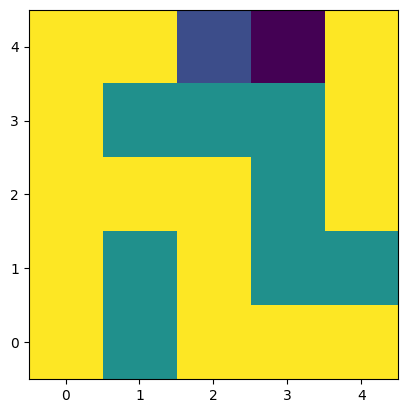

In [10]:
r = runs[0]
for t in range(0, r.steps):
    grid = r.grid(t)
    plt.imshow(grid, origin='lower')
    display.display(plt.gcf())
    display.clear_output(wait=True)